<a href="https://colab.research.google.com/github/yevheniia08/Emails-Sent-by-Month/blob/main/Data_set_Preparation_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/Final_project

#завантажую датасети
countries_data = pd.read_csv("countries.csv")
events_data = pd.read_csv("events.csv")
products_data = pd.read_csv("products.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Final_project


##Countries_data

In [ ]:
countries_data.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
#виводжу загальну інформацію
print(f"Total rows and columns: {countries_data.shape}")

Total rows and columns: (249, 5)


In [ ]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
#шукаю порожні значення
countries_data.isna().sum() / countries_data.shape[0] * 100

,0
name,0.000000
alpha-2,0.401606
alpha-3,0.000000
region,0.401606
sub-region,0.401606


In [ ]:
countries_data[countries_data.isnull().any(axis=1)]


,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


Датасет містить пропущені значення у колонках alpha-2, region та sub-region. Оскільки Антарктика не має регіону та субрегіону, замінимо їх на UNK (unknown). Також додамо alpha-2	для Намібії.



In [ ]:
countries_data[['region', 'sub-region']] = countries_data[['region', 'sub-region']].fillna('UNK')

countries_data['alpha-2'] = countries_data['alpha-2'].fillna('NA')

countries_data.isna().sum()

,0
name,0
alpha-2,0
alpha-3,0
region,0
sub-region,0


In [ ]:
#шукаю дублікати
countries_data.duplicated().sum()

0

Датасет містить 249 рядків і 5 колонок. Усі дані представлені у форматі об'єктів. Тип даних кожної колонки визначено правильно. Набір даних містить інформацію про країни, їхнє 3-х або 2-х літерне кодування, регіони та субрегіони.  
Пропущені значення замінено відповідними значеннями ("UNK" та "NA"). Дублікати відсутні.

##Events_data

In [ ]:
events_data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
#трансформую назви колонок
events_data.columns = events_data.columns.str.lower().str.replace(" ", "_")

#видаляю зайві пробіли
events_data = events_data.apply(
    lambda x: x.astype(str).str.strip() if x.dtype == "object" else x
)

In [ ]:
#виводжу загальну інформація про events_data
print(f"Total rows and columns: {events_data.shape}")

Total rows and columns: (1330, 10)


In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1330 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
#шукаю порожні значення
events_data.isna().sum() / events_data.shape[0] * 100

,0
order_id,0.000000
order_date,0.000000
ship_date,0.000000
order_priority,0.000000
country_code,0.000000
product_id,0.000000
sales_channel,0.000000
units_sold,0.150376
unit_price,0.000000
unit_cost,0.000000


Датасет містить пропущені значення у стовпцях country_code та units_sold. Частка пропущених значень у стовпці units_sold є невеликою. Заповнимо пропуски середньою кількістю проданих одиниць. Пропущені значення у стовпці country_code замінимо на UNK, щоб не втрачати велику кількість даних.

In [ ]:
events_data["units_sold"] = events_data["units_sold"].fillna(events_data["units_sold"].mean())
events_data["country_code"] = events_data["country_code"].fillna("UNK")

events_data.isna().sum()

,0
order_id,0
order_date,0
ship_date,0
order_priority,0
country_code,0
product_id,0
sales_channel,0
units_sold,0
unit_price,0
unit_cost,0


In [ ]:
#перевіряю тип даних стовпців
events_data.dtypes

,0
order_id,int64
order_date,object
ship_date,object
order_priority,object
country_code,object
product_id,int64
sales_channel,object
units_sold,float64
unit_price,float64
unit_cost,float64


In [ ]:
#змінюю типи даних стовпців
events_data["order_id"] = events_data["order_id"].astype("object")
events_data["product_id"] = events_data["product_id"].astype("object")
events_data["order_date"] = pd.to_datetime(events_data["order_date"])
events_data["ship_date"] = pd.to_datetime(events_data["ship_date"])
events_data["units_sold"] = events_data["units_sold"].astype("int")

events_data.dtypes

,0
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
order_priority,object
country_code,object
product_id,object
sales_channel,object
units_sold,int64
unit_price,float64
unit_cost,float64


In [ ]:
#шукаю дублікати
events_data.duplicated().sum()

0

In [ ]:
#перевіряю аномальні значення та викиди
events_data.describe()

,order_date,ship_date,units_sold,unit_price,unit_cost
count,1330,1330,1330.000000,1330.000000,1330.000000
mean,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,4952.201504,264.893541,187.246812
min,2010-01-01 00:00:00,2010-01-10 00:00:00,2.000000,9.330000,6.920000
25%,2011-12-16 06:00:00,2012-01-03 00:00:00,2360.750000,81.730000,35.840000
50%,2013-10-17 00:00:00,2013-11-09 00:00:00,4958.000000,154.060000,97.440000
75%,2015-08-28 18:00:00,2015-10-03 18:00:00,7458.750000,437.200000,263.330000
max,2017-07-23 00:00:00,2017-08-31 00:00:00,9999.000000,668.270000,524.960000
std,NaN,NaN,2903.012170,217.323460,176.158873


**Загальна інформація**. Набір даних містить 1330 рядків і 10 стовпців. У датасеті представлена інформація про замовлення, дату його оформлення і доставки, його пріоритет. Наявний код країни замовлення та канал продажу. А також ідентифікатор замовленого продукту, кількість проданих одиниць, ціна за одиницю та її собівартість. Порожні значення у стовпці units_sold було замінено на середнє значення проданих одиниць. Невідомий код країни у стовпці country_cod замінено на UNK.  
Стовпці order_id та product_id змінено з числових на категоріальні. Стовпці order_date та ship_date після трансформації мають тип дати. Дані у колонці units_sold відображаються як цілочисельні.  
Дублікати у наборі даних відсутні.  
**Описова статистика**. Оскільки різниця між медіанним та середнім значенням у стовпці unit_price є значною, можемо стверджувати, що більшість товарів мають низьку вартість, проте також наявні товари зі значно високою вартістю. Так само і з собівартістю товару: переважають дешеві товари, проте є й значно дорожчі. Незначна різниця між медіанним та середнім значенням у стовпці units_sold, а також велике середнє відхилення вказує на те, що клієнти замовляють різну кількість товарів (від 2 до 9999 одиниць).

##Products_data

In [ ]:
products_data.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
#виводжу загальну інформацію про products_data
products_data.shape

(12, 2)

In [ ]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [ ]:
#перевіряю пропущені значення
products_data.isna().sum()

,0
id,0
item_type,0


In [ ]:
#змінюю тип даних
products_data["id"] = products_data["id"].astype("object")

products_data.dtypes

,0
id,object
item_type,object


In [ ]:
#перевіряю дублікати
products_data.duplicated().sum()

0

Датасет містить 12 рядків та 2 колонки, у яких представлена інформація про ідентифікатор продукту та його тип. Після трансформації стовпець id має категоріальне значення. Пропущених значень немає. Дублікати відсутні.

##Data analysis and visualization

In [ ]:
#об'єдную датафрейми
merged_data = events_data.merge(products_data, left_on="product_id", right_on="id", how="left")
df = merged_data.merge(countries_data, left_on="country_code", right_on="alpha-3", how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1330 non-null   object        
 1   order_date      1330 non-null   datetime64[ns]
 2   ship_date       1330 non-null   datetime64[ns]
 3   order_priority  1330 non-null   object        
 4   country_code    1330 non-null   object        
 5   product_id      1330 non-null   object        
 6   sales_channel   1330 non-null   object        
 7   units_sold      1330 non-null   int64         
 8   unit_price      1330 non-null   float64       
 9   unit_cost       1330 non-null   float64       
 10  id              1330 non-null   object        
 11  item_type       1330 non-null   object        
 12  name            1248 non-null   object        
 13  alpha-2         1248 non-null   object        
 14  alpha-3         1248 non-null   object        
 15  regi

In [ ]:
#видаляю зайві стовпці та змінюю назву стовпця name
df = df.drop(["country_code", "alpha-2", "alpha-3", "id"], axis=1)
df.rename(columns={"name": "country"}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1330 non-null   object        
 1   order_date      1330 non-null   datetime64[ns]
 2   ship_date       1330 non-null   datetime64[ns]
 3   order_priority  1330 non-null   object        
 4   product_id      1330 non-null   object        
 5   sales_channel   1330 non-null   object        
 6   units_sold      1330 non-null   int64         
 7   unit_price      1330 non-null   float64       
 8   unit_cost       1330 non-null   float64       
 9   item_type       1330 non-null   object        
 10  country         1248 non-null   object        
 11  region          1248 non-null   object        
 12  sub-region      1248 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 135.2+ KB


In [ ]:
#змінюю порожні значення на UNK
df = df.fillna("UNK")
df.isna().sum()

<ipython-input-124-5c6bf1b50913>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna("UNK")


,0
order_id,0
order_date,0
ship_date,0
order_priority,0
product_id,0
sales_channel,0
units_sold,0
unit_price,0
unit_cost,0
item_type,0


###Загальні метрики

In [ ]:
df["revenue"] = df["units_sold"] * df["unit_price"]
df["costs"] = df["units_sold"] * df["unit_cost"]
df["profit"] = df["revenue"] - df["costs"]

total_profit = df["profit"].sum()
total_costs = df["costs"].sum()
total_revenue = df["revenue"].sum()
total_units_sold = df["units_sold"].sum()
total_orders = df["order_id"].count()
countries_cnt = df["country"].nunique()
avg_units_sold = df["units_sold"].mean()
avg_revenue = df["revenue"].mean()
avg_profit = df["profit"].mean()

print(f"Total revenue ($): {total_revenue:.2f}")
print(f"Total costs ($): {total_costs:.2f}")
print(f"Total profit ($): {total_profit:.2f}")
print(f"Total number of items sold: {total_units_sold}")
print(f"Total number of orders: {total_orders}")
print(f"Total number of countries: {countries_cnt}")
print(f"Average units sold per order: {avg_units_sold:.0f}")
print(f"Average revenue per order: {avg_revenue:.2f}")
print(f"Average profit per order: {avg_profit:.2f}")

Total revenue ($): 1704623334.45
Total costs ($): 1202781523.93
Total profit ($): 501841810.52
Total number of items sold: 6586428
Total number of orders: 1330
Total number of countries: 46
Average units sold per order: 4952
Average revenue per order: 1281671.68
Average profit per order: 377324.67


###Аналіз категорій товарів

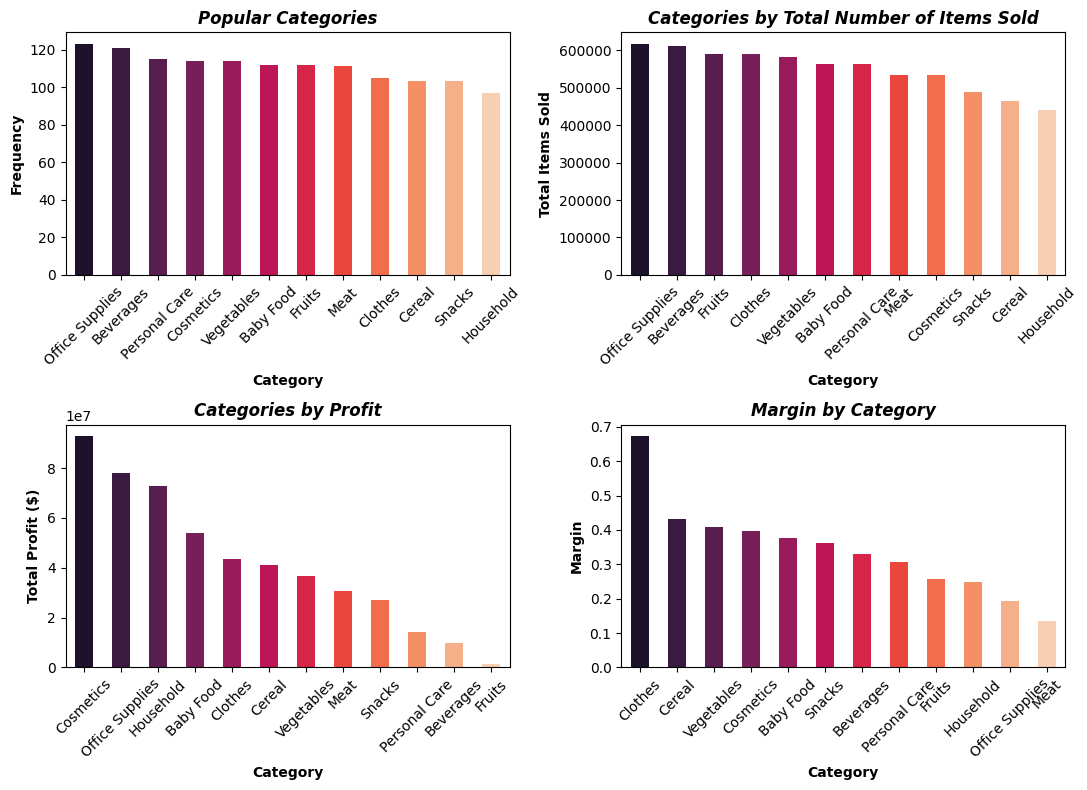

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(11, 8))
colors = sns.color_palette("rocket", 12)

#визначаю найпопулярнішу категорію
category_frequency = df.groupby("item_type").size().sort_values(ascending=False)

category_frequency.plot(kind="bar",color=colors, ax=ax[0, 0])
ax[0, 0].set_title("Popular Categories", fontweight="semibold", fontstyle="italic")
ax[0, 0].set_xlabel("Category", fontweight="semibold")
ax[0, 0].set_ylabel("Frequency", fontweight="semibold")
ax[0, 0].tick_params(axis="x", rotation=45)


#аналізую категорії за кількістю проданих одиниць
category_sales = df.groupby("item_type")["units_sold"].sum().sort_values(ascending=False)

category_sales.plot(kind="bar", color=colors, ax=ax[0, 1])
ax[0, 1].set_title("Categories by Total Number of Items Sold", fontweight="semibold", fontstyle="italic")
ax[0, 1].set_xlabel("Category", fontweight="semibold")
ax[0, 1].set_ylabel("Total Items Sold", fontweight="semibold")
ax[0, 1].tick_params(axis="x", rotation=45)


#аналізую категорії за прибутком
category_profit = df.groupby("item_type")["profit"].sum().sort_values(ascending=False)

category_profit.plot(kind="bar", color=colors, ax=ax[1, 0])
ax[1, 0].set_title("Categories by Profit", fontweight="semibold", fontstyle="italic")
ax[1, 0].set_xlabel("Category", fontweight="semibold")
ax[1, 0].set_ylabel("Total Profit ($)", fontweight="semibold")
ax[1, 0].tick_params(axis="x", rotation=45)


#аналізую категорії за маржею
df["margin"] = df["profit"] / df["revenue"]
category_margin = df.groupby("item_type")["margin"].mean().sort_values(ascending=False)

category_margin.plot(kind="bar", color=colors, ax=ax[1, 1])
ax[1, 1].set_title("Margin by Category", fontweight="semibold", fontstyle="italic")
ax[1, 1].set_xlabel("Category", fontweight="semibold")
ax[1, 1].set_ylabel("Margin", fontweight="semibold")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Найбільш популярними категоріями товарів компанії є Office Supplies та Beverages. Найбільшу кількість товарів було продано саме в цих категріях. Найменш популярними категоріями є Snacks, Vegetables та Household. Найменша кількість одиниць товару була продана в категорії Household, проте вона приносить компанії середній прибуток. Категорія Office Supplies є найпопулярнішою, найкраще продається та приносить значний прибуток компанії, проте прибуток на одиницю товару є невеликим.  
Найбільший прибуток компанія отримує з товарів категорії Cosmetics, яка має середню популярність та продається в невеликих об'ємах. Найменший прибуток приносить категорія Fruits.  
Найбільший прибуток з одиниці товару компанія отримує в категорії Clothes, яка має середню популярність та добре продається. Найменший - Meat.

###Аналіз країн

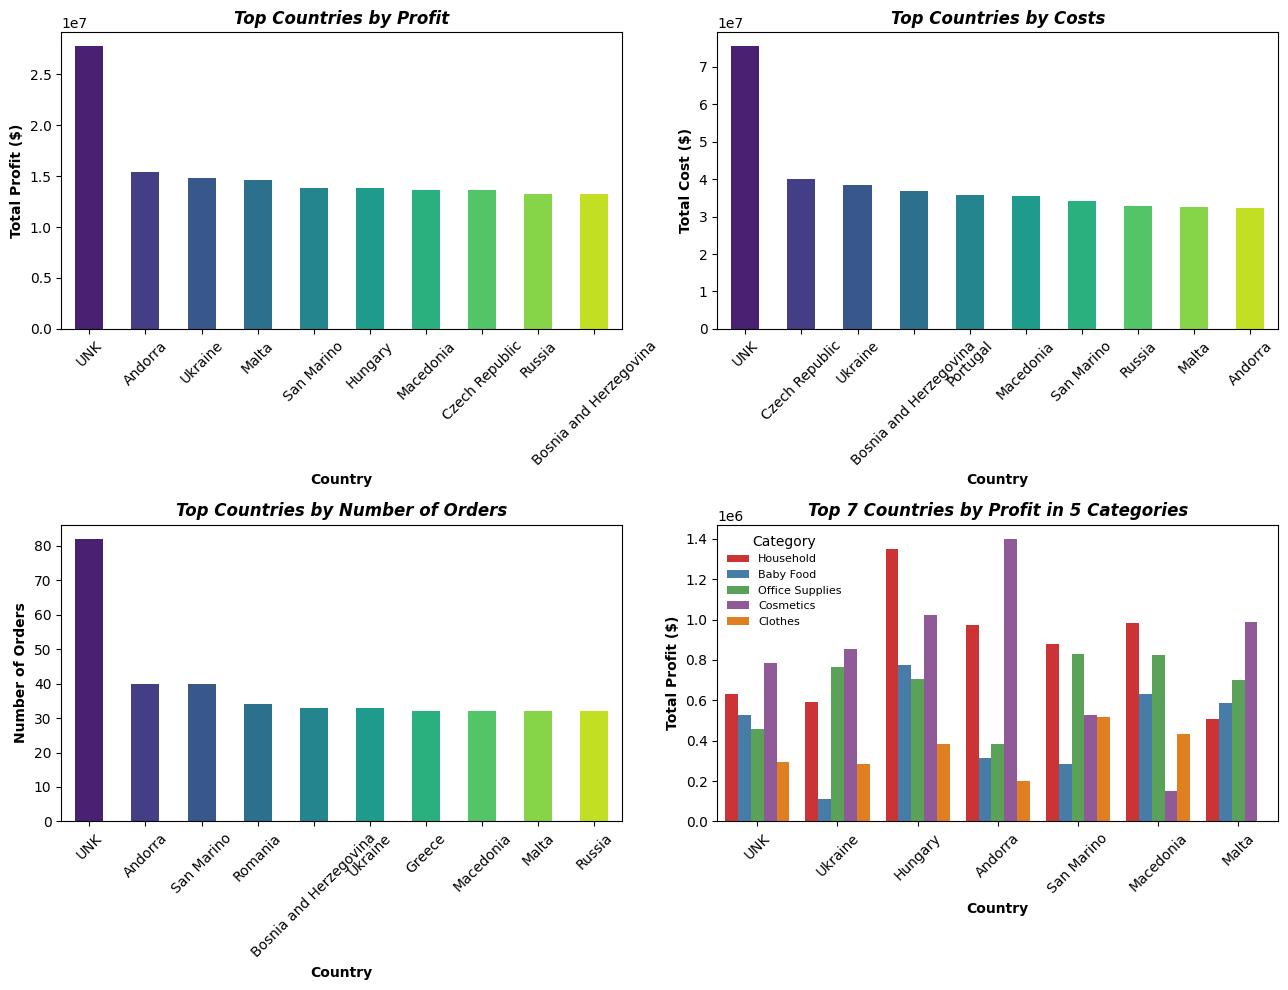

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))
colors = sns.color_palette("viridis", 10)

#аналізую країни за прибутком
top_country_profit = df.groupby("country")["profit"].sum().nlargest(10)

top_country_profit.plot(kind="bar", color=colors, ax=ax[0, 0])
ax[0, 0].set_title("Top Countries by Profit", fontweight="semibold", fontstyle="italic")
ax[0, 0].set_xlabel("Country", fontweight="semibold")
ax[0, 0].set_ylabel("Total Profit ($)", fontweight="semibold")
ax[0, 0].tick_params(axis="x", rotation=45)

#аналізую країни за витратами
top_country_costs = df.groupby("country")["costs"].sum().nlargest(10)

top_country_costs.plot(kind="bar", color=colors, ax=ax[0, 1])
ax[0, 1].set_title("Top Countries by Costs", fontweight="semibold", fontstyle="italic")
ax[0, 1].set_xlabel("Country", fontweight="semibold")
ax[0, 1].set_ylabel("Total Cost ($)", fontweight="semibold")
ax[0, 1].tick_params(axis="x", rotation=45)


#аналізую країни за кількістю замовлень
top_country_orders = df.groupby("country")["order_id"].count().nlargest(10)

top_country_orders.plot(kind="bar", color=colors, ax=ax[1, 0])
ax[1, 0].set_title("Top Countries by Number of Orders", fontweight="semibold", fontstyle="italic")
ax[1, 0].set_xlabel("Country", fontweight="semibold")
ax[1, 0].set_ylabel("Number of Orders", fontweight="semibold")
ax[1, 0].tick_params(axis="x", rotation=45)


#аналізую країни за прибутком і категоріями
top_category_profit = df.groupby("item_type")["profit"].sum().nlargest(5)
top_country_profit = df.groupby("country")["profit"].sum().nlargest(7)
top_categories_country_data = df[(df["item_type"].isin(top_category_profit.index)) & (df["country"].isin(top_country_profit.index))]

sns.barplot(
    data=top_categories_country_data,
    x="country",
    y="profit",
    hue="item_type",
    palette="Set1",
    ax=ax[1, 1],
    errorbar=("ci", False)
    )
ax[1, 1].set_title("Top 7 Countries by Profit in 5 Categories", fontweight="semibold", fontstyle="italic")
ax[1, 1].set_xlabel("Country", fontweight="semibold")
ax[1, 1].set_ylabel("Total Profit ($)", fontweight="semibold")
ax[1, 1].tick_params(axis="x", rotation=45)
ax[1, 1].legend(
    title="Category",
    fontsize=8,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


Найбільшу кількість прибутку компанії приносять такі країни як Андорра, Україна та Мальта, найменшу - Чехія, Росія, Боснія і Герцеговина. Найбільш витратними країнами є Чехія, Україна та Боснія і Герцеговина. Найменш витратні Мальта та Андорра. Найбільшу кількість одиниць товару замовляє у компанії Андорра. Найбільший прибуток компанія отримує від Андорри з товарів категорії Cosmetics. А також від Угорщини з товарів Household. Середній прибуток компанія отримує з товарів категорії Office Supplies.

###Аналіз регіонів

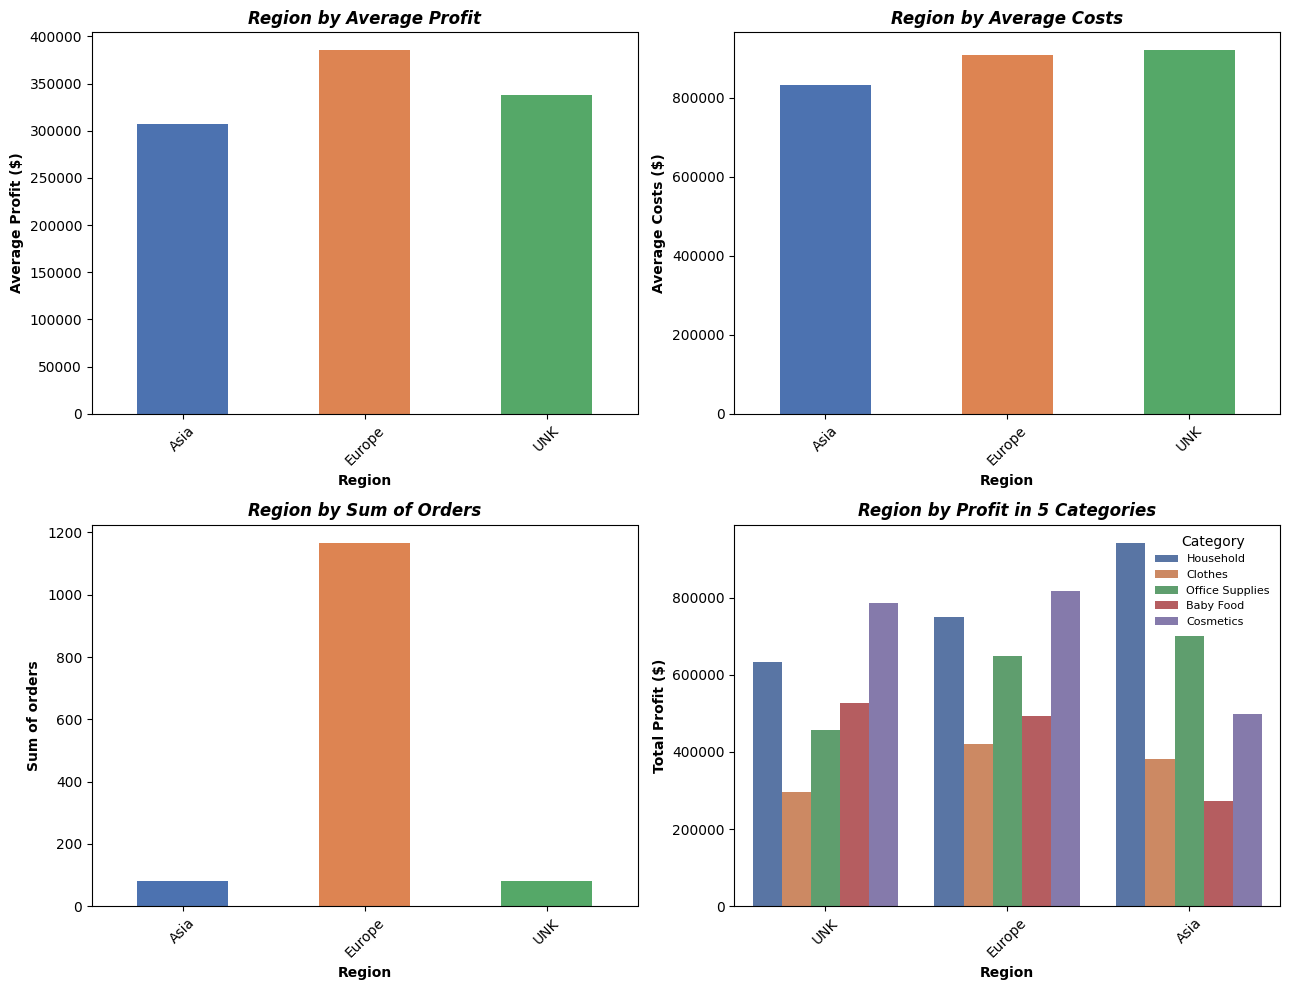

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))
colors = sns.color_palette("deep", 3)

#аналізую регіони за середнім прибутком
region_by_profit = df.groupby("region")["profit"].mean()

region_by_profit.plot(kind="bar", ax=ax[0, 0], color=colors)
ax[0, 0].set_title("Region by Average Profit", fontweight="semibold", fontstyle="italic")
ax[0, 0].set_xlabel("Region", fontweight="semibold")
ax[0, 0].set_ylabel("Average Profit ($)", fontweight="semibold")
ax[0, 0].tick_params(axis="x", rotation=45)


#аналізую регіони за середніми витратими
region_by_costs = df.groupby("region")["costs"].mean()

region_by_costs.plot(kind="bar", ax=ax[0, 1], color=colors)
ax[0, 1].set_title("Region by Average Costs", fontweight="semibold", fontstyle="italic")
ax[0, 1].set_xlabel("Region", fontweight="semibold")
ax[0, 1].set_ylabel("Average Costs ($)", fontweight="semibold")
ax[0, 1].tick_params(axis="x", rotation=45)

#аналізую регіони за кількістю замовлень
region_by_orders = df.groupby("region")["order_id"].count()

region_by_orders.plot(kind="bar", ax=ax[1, 0], color=colors)
ax[1, 0].set_title("Region by Sum of Orders", fontweight="semibold", fontstyle="italic")
ax[1, 0].set_xlabel("Region", fontweight="semibold")
ax[1, 0].set_ylabel("Sum of orders", fontweight="semibold")
ax[1, 0].tick_params(axis="x", rotation=45)

#аналізую регіони за прибутком і категоріями
top_category_profit = df.groupby("item_type")["profit"].sum().nlargest(5)
top_categories_region_data = df[df["item_type"].isin(top_category_profit.index)]

sns.barplot(
    data=top_categories_region_data,
    x="region",
    y="profit",
    hue="item_type",
    palette="deep",
    ax=ax[1, 1],
    errorbar=("ci", False)
    )
ax[1, 1].set_title("Region by Profit in 5 Categories", fontweight="semibold", fontstyle="italic")
ax[1, 1].set_xlabel("Region", fontweight="semibold")
ax[1, 1].set_ylabel("Total Profit ($)", fontweight="semibold")
ax[1, 1].tick_params(axis="x", rotation=45)
ax[1, 1].legend(
    title="Category",
    fontsize=8,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

Компанія співпрацює з двома регіонами: Європа та Азія. Найбільший середній прибуток компанії приносить Європа. Середні витрати у кожному регіоні приблизно однакові, проте більш витратною є Європа. Найбільша кількість замовлень надходить з Європи. Найбільше прибутку в Азії приносять товари категорії Household, у Європі - Cosmetics. Середній прибуток у кожному регіоні компанія отримує з категорії Office Supplies.

###Аналіз каналів продажу

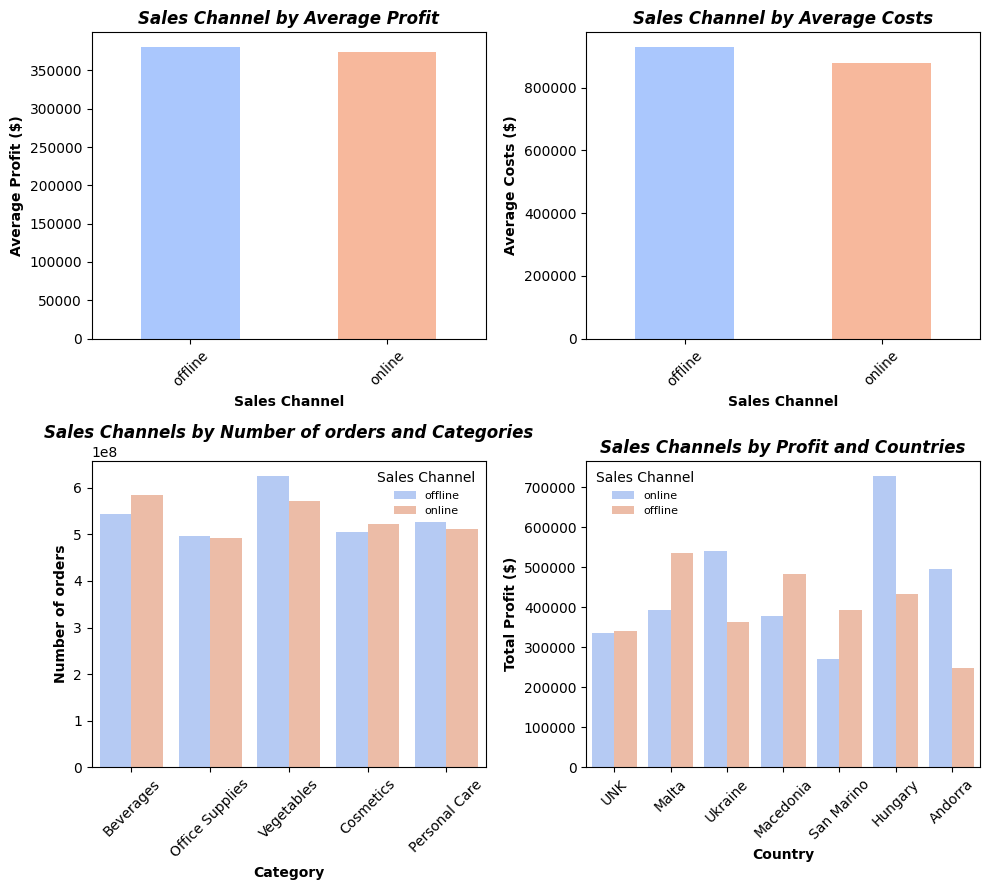

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 9))
colors = sns.color_palette("coolwarm", 2)
df["sales_channel"] = df["sales_channel"].str.lower()

#аналізую канали продажу за середнім прибутком
sales_channel_by_profit = df.groupby("sales_channel")["profit"].mean()

sales_channel_by_profit.plot(kind="bar", color=colors, ax=ax[0, 0])
ax[0, 0].set_title("Sales Channel by Average Profit", fontweight="semibold", fontstyle="italic")
ax[0, 0].set_xlabel("Sales Channel", fontweight="semibold")
ax[0, 0].set_ylabel("Average Profit ($)", fontweight="semibold")
ax[0, 0].tick_params(axis="x", rotation=45)


#аналізую канали продажу за середніми витратами
sales_channel_by_costs = df.groupby("sales_channel")["costs"].mean()

sales_channel_by_costs.plot(kind="bar", color=colors, ax=ax[0, 1])
ax[0, 1].set_title("Sales Channel by Average Costs", fontweight="semibold", fontstyle="italic")
ax[0, 1].set_xlabel("Sales Channel", fontweight="semibold")
ax[0, 1].set_ylabel("Average Costs ($)", fontweight="semibold")
ax[0, 1].tick_params(axis="x", rotation=45)


#аналізую канали продажу за кількістю товарів і категорією
top_category_orders = df.groupby("item_type")["order_id"].count().nlargest(5)
top_category_data = df[df["item_type"].isin(top_category_orders.index)]

sns.barplot(
    data=top_category_data,
    x="item_type",
    y="order_id",
    hue="sales_channel",
    palette="coolwarm",
    ax=ax[1, 0],
    errorbar=("ci", False)
    )
ax[1, 0].set_title("Sales Channels by Number of orders and Categories", fontweight="semibold", fontstyle="italic")
ax[1, 0].set_xlabel("Category", fontweight="semibold")
ax[1, 0].set_ylabel("Number of orders", fontweight="semibold")
ax[1, 0].tick_params(axis="x", rotation=45)
ax[1, 0].legend(
    title="Sales Channel",
    fontsize=8,
    title_fontsize=10,
    frameon=False
)


#аналізую канали продажу за прибутком і країною
top_country_profit = df.groupby("country")["profit"].sum().nlargest(7)
top_country_data = df[df["country"].isin(top_country_profit.index)]

sns.barplot(
    data=top_country_data,
    x="country",
    y="profit",
    hue="sales_channel",
    palette="coolwarm",
    ax=ax[1, 1],
    errorbar=("ci", False)
    )
ax[1, 1].set_title("Sales Channels by Profit and Countries", fontweight="semibold", fontstyle="italic")
ax[1, 1].set_xlabel("Country", fontweight="semibold")
ax[1, 1].set_ylabel("Total Profit ($)", fontweight="semibold")
ax[1, 1].tick_params(axis="x", rotation=45)
ax[1, 1].legend(
    title="Sales Channel",
    fontsize=8,
    title_fontsize=10,
    frameon=False
)


plt.tight_layout()
plt.show()

Обидва канали продажу, як онлайн, так і офлайн, приносять приблизно однаковий середній прибуток. Середні витрати на офлайн-канал є трохи більшими. Було розглянуто кількість замовлень у 5 найпопулярніших категоріях відносно каналу продажу. Продукти категорій Office Supplies, Vegetables та Personal Care частіше продаються офлайн. Товари Beverages та Cosmetics частіше продаються онлайн. Було розглянуто загальний прибуток у розрізі каналів продажу та топ 10 країн за прибутком. Найбільший прибуток від онлайн-замовлень компанії приносить Угорщина. Найбільший прибуток від офлайн-замовлень - Мальта. Найменший прибуток онлайн - Сан-Марино, найменший офлайн - Андорра.

###Аналіз інтервалу доставки

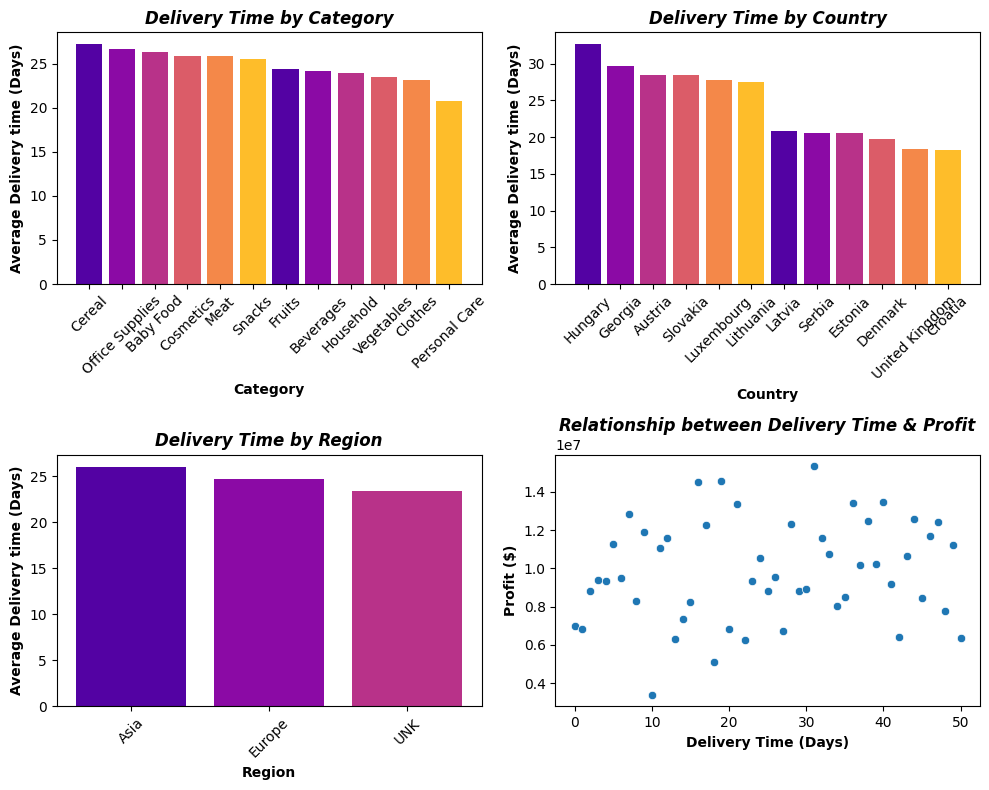

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
colors = sns.color_palette("plasma")

#рахую кількість днів для виконання замовлення
df["date_difference"] = (df["ship_date"] - df["order_date"]).dt.days

#аналізую категорії за часом доставки
categories_by_delivery = df.groupby("item_type")["date_difference"].mean().sort_values(ascending=False)

ax[0, 0].bar(categories_by_delivery.index, categories_by_delivery.values, color=colors)
ax[0, 0].set_title("Delivery Time by Category", fontweight="semibold", fontstyle="italic")
ax[0, 0].set_xlabel("Category", fontweight="semibold")
ax[0, 0].set_ylabel("Average Delivery time (Days)", fontweight="semibold")
ax[0, 0].tick_params(axis="x", rotation=45)


#аналізую країни за часом виконання замовлення
countries_by_delivery = df.groupby("country")["date_difference"].mean().reset_index()
fastest_countries = countries_by_delivery.nsmallest(6, ["date_difference"])
slowest_countries = countries_by_delivery.nlargest(6, ["date_difference"])
combined = pd.concat([fastest_countries, slowest_countries]).sort_values(by="date_difference", ascending=False)

ax[0, 1].bar(combined["country"], combined["date_difference"], color=colors)
ax[0, 1].set_title("Delivery Time by Country", fontweight="semibold", fontstyle="italic")
ax[0, 1].set_xlabel("Country", fontweight="semibold")
ax[0, 1].set_ylabel("Average Delivery time (Days)", fontweight="semibold")
ax[0, 1].tick_params(axis="x", rotation=45)


#аналізую регіони за часом доставки
region_by_delivery = df.groupby("region")["date_difference"].mean()

ax[1, 0].bar(region_by_delivery.index, region_by_delivery.values, color=colors)
ax[1, 0].set_title("Delivery Time by Region", fontweight="semibold", fontstyle="italic")
ax[1, 0].set_xlabel("Region", fontweight="semibold")
ax[1, 0].set_ylabel("Average Delivery time (Days)", fontweight="semibold")
ax[1, 0].tick_params(axis="x", rotation=45)


#аналізую залежність прибутку від часу, необхідного на відвантаження товару
profit_by_delivery = df.groupby("date_difference")["profit"].sum().reset_index()
sns.scatterplot(data=profit_by_delivery, x="date_difference", y="profit", ax=ax[1, 1])
ax[1, 1].set_title("Relationship between Delivery Time & Profit", fontweight="semibold", fontstyle="italic")
ax[1, 1].set_xlabel("Delivery Time (Days)", fontweight="semibold")
ax[1, 1].set_ylabel("Profit ($)", fontweight="semibold")


plt.tight_layout()
plt.show()

Товари категорій Cereal, Office Supplies, Baby food та Cosmetics доставляються найдовше. Товари Personal Care, Clothes та Vegetables доставляються найшвидше.  
Хорватія, Данія та Естонія отримують товари найшвидше, хоча компанія користується невеликим попитом у цих країнах. Найдовша доставка в Угорщину, Грузію та Австрію. У середньому Європа отримує замовлення швидше, ніж Азія.  
Прибуток жодним чином не залежить від часу, необхідного на вивантаження товару.

###Аналіз динаміки продажів

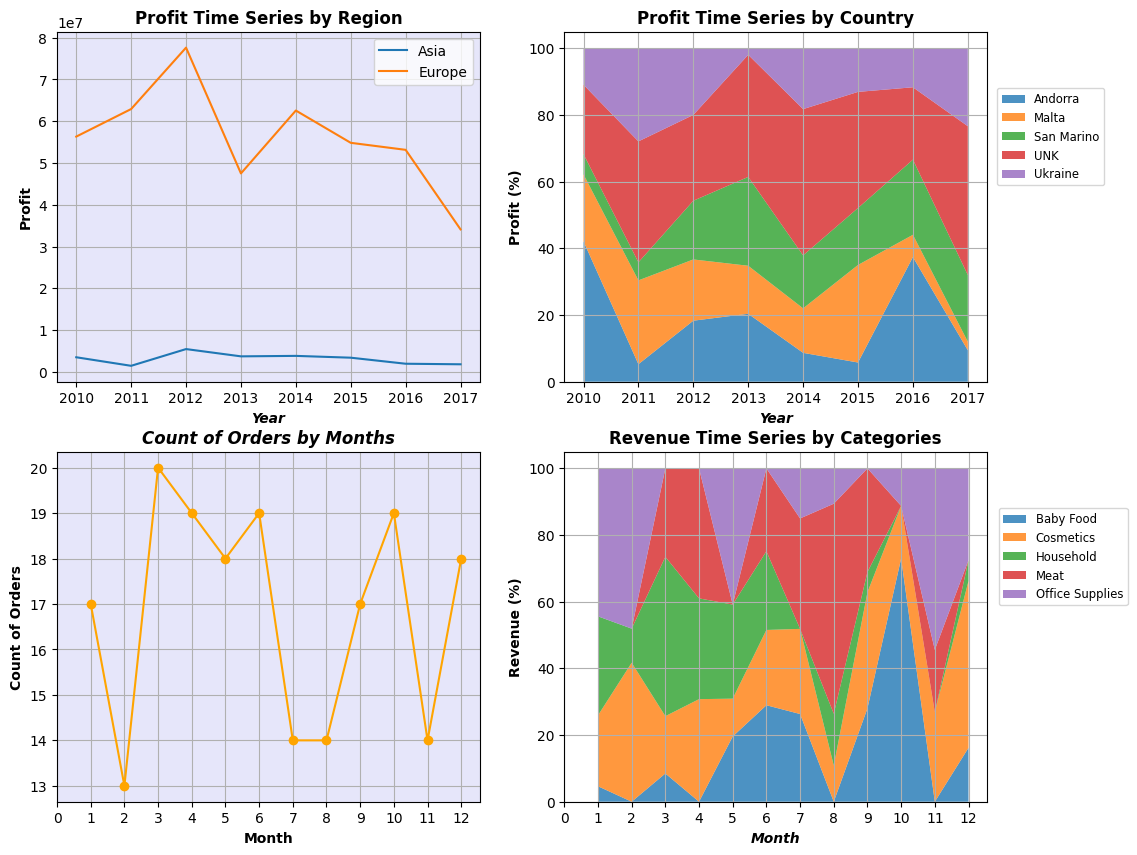

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#аналізую загальний прибуток у розрізі регіонів та років
df["year"] = df["order_date"].dt.year.astype("str")
time_series_data_profit = (
    df.groupby(["region", "year"])["profit"].sum().reset_index()
)
for region in ["Asia", "Europe"]:
  region_data = time_series_data_profit[time_series_data_profit["region"] == region]
  ax[0, 0].plot(region_data["year"], region_data["profit"], label=region)

ax[0, 0].set_xlabel("Year", fontweight="semibold", fontstyle="italic")
ax[0, 0].set_ylabel("Profit", fontweight="semibold")
ax[0, 0].set_title("Profit Time Series by Region", fontweight="semibold")
ax[0, 0].legend()
ax[0, 0].grid(True)
ax[0, 0].set_facecolor("lavender")


#аналізую загальний прибуток у розрізі топ 5 країн за прибутком та років
top_country_profit = df.groupby("country")["profit"].sum().nlargest(5)
filtered_data = df[df["country"].isin(top_country_profit.index)]
time_series_data_profit = (
    filtered_data.groupby(["country", "year"])["profit"].sum().reset_index()
)
profit_pivot = time_series_data_profit.pivot(index="year", columns="country", values="profit")
profit_percentage = profit_pivot.div(profit_pivot.sum(axis=1), axis=0) * 100

ax[0, 1].stackplot(
    profit_percentage.index,
    profit_percentage.T,
    labels=profit_percentage.columns,
    alpha=0.8
)

ax[0, 1].set_xlabel("Year", fontweight="semibold", fontstyle="italic")
ax[0, 1].set_ylabel("Profit (%)", fontweight="semibold")
ax[0, 1].set_title("Profit Time Series by Country", fontweight="semibold")
ax[0, 1].legend(loc="center", bbox_to_anchor=(1.15, 0.7), ncol=1, fontsize="small")
ax[0, 1].grid(True)


#аналізую кількість проданих товарів за місяцями у розрізі категорій
year_data = df[df["year"] == "2012"].reset_index()
year_data["month"] = year_data["order_date"].dt.month

orders_grouped_by_month = year_data.groupby("month")["order_id"].count()
orders_grouped_by_month.plot(marker="o", color="orange", ax=ax[1, 0])
ax[1, 0].set_title("Count of Orders by Months", fontweight="semibold", fontstyle="italic")
ax[1, 0].set_xlabel("Month", fontweight="semibold")
ax[1, 0].set_ylabel("Count of Orders", fontweight="semibold")

x_ticks = np.arange(0, year_data["month"].max() + 1, 1)
ax[1, 0].set_xticks(x_ticks)

ax[1, 0].grid(True)
ax[1, 0].set_facecolor("lavender")

#аналізую дохід у розрізі місяців та топ 5 популярних категорій
top_category_revenue = year_data.groupby("item_type")["revenue"].sum().nlargest(5)
filtered_data = year_data[year_data["item_type"].isin(top_category_revenue.index)]

revenue_by_month_category = filtered_data.groupby(["month", "item_type"])["revenue"].sum().reset_index()
revenue_pivot = revenue_by_month_category.pivot(index="month", columns="item_type", values="revenue").fillna(0)

revenue_percentage = revenue_pivot.div(revenue_pivot.sum(axis=1), axis=0) * 100

ax[1, 1].stackplot(
    revenue_percentage.index,
    revenue_percentage.T,
    labels=revenue_percentage.columns,
    alpha=0.8
)

x_ticks = np.arange(0, year_data["month"].max() + 1, 1)
ax[1, 1].set_xticks(x_ticks)
ax[1, 1].set_xlabel("Month", fontweight="semibold", fontstyle="italic")
ax[1, 1].set_ylabel("Revenue (%)", fontweight="semibold")
ax[1, 1].set_title("Revenue Time Series by Categories", fontweight="semibold")
ax[1, 1].legend(loc="center", bbox_to_anchor=(1.18, 0.7), ncol=1, fontsize="small")
ax[1, 1].grid(True)


plt.show()

Найбільш прибутковим роком для компанії став 2012. Загалом регіон Азія приносить відносно стабільний прибуток компанії, з піком у 2012 році та падінням у 2013. Після 2017 року є тенденції до невеликого зниження прибутку. Прибуток у Європі є динамічним з піками у 2012 та 2014 роках та падінням у 2013 та 2017 році.  
Було проаналізовано топ 4 країни за прибутком: Андорра, Мальта, Сан-Марино та Україна у розрізі років та прибутку. Спостерігалося падіння прибутку в усіх 4 країнах у 2011 році та у 2014. Виключенням є Андорра, де падіння відбулося в 2015 році. Зростання прибутку відбулося в 2010, 2013 та 2016 роках. Після 2017 року спостерігається тенденція до зниження прибутку. У 2018-2019 роках можемо спрогнозувати підвищення прибутку.  
Компанія отримує більшу кількість замовлень у весняний та осінній період. У зимовий та літній період кількість замовлень зменшується.  
Було проаналізовано топ 5 категорій за кількістю доходу у розрізі місяців. Загалом попит на усі проаналізовані категорії товарів зростає в осінній період, після спаду влітку. Косметика та товари для дому краще продаються в перший половині року. У той час як дохід від дитячого харчування та м'яса припадає на другу поливу року. Товари для офісу добре продаються протягом усього року, виключення - березень, червень та вересень.

###Аналіз за днями тижня

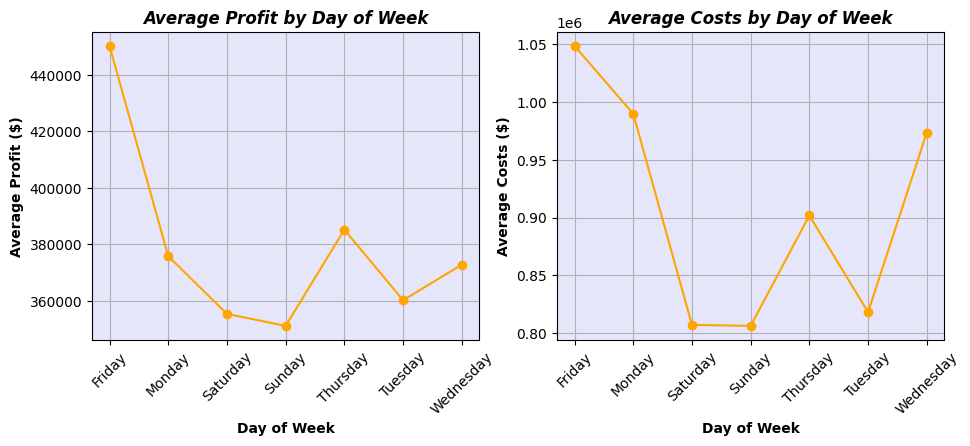

In [ ]:
#виводжу дні тижня
df["day_week"] = df["order_date"].dt.day_name()

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

#аналізую середній прибуток за днями тижня
avg_profit_by_day_week = df.groupby("day_week")["profit"].mean()
avg_profit_by_day_week.plot(ax=ax[0], color="orange", marker="o")
ax[0].set_title("Average Profit by Day of Week", fontweight="semibold", fontstyle="italic")
ax[0].set_xlabel("Day of Week", fontweight="semibold")
ax[0].set_ylabel("Average Profit ($)", fontweight="semibold")
ax[0].set_facecolor("lavender")
ax[0].tick_params(axis="x", rotation=45)
ax[0].grid(True)

#аналізую середні витрати за днями тижня
avg_costs_by_day_week = df.groupby("day_week")["costs"].mean()
avg_costs_by_day_week.plot(ax=ax[1], color="orange", marker="o")
ax[1].set_title("Average Costs by Day of Week", fontweight="semibold", fontstyle="italic")
ax[1].set_xlabel("Day of Week", fontweight="semibold")
ax[1].set_ylabel("Average Costs ($)", fontweight="semibold")
ax[1].set_facecolor("lavender")
ax[1].tick_params(axis="x", rotation=45)
ax[1].grid(True)

plt.show()

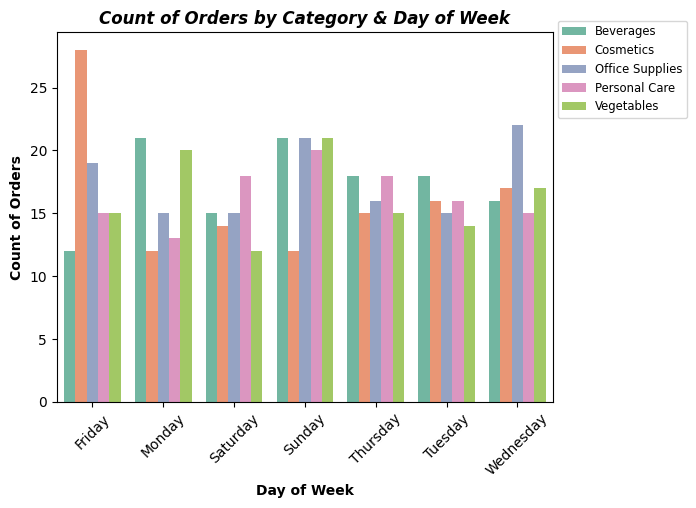

In [ ]:
#аналізую топ 5 категорій за популярністю у розрізі днів тижня

top_category_orders = df.groupby("item_type")["order_id"].count().nlargest(5)
filtered_data = df[df["item_type"].isin(top_category_orders.index)]
orders_category_week = filtered_data.groupby(["item_type", "day_week"])["order_id"].count().reset_index()

sns.barplot(
    data=orders_category_week,
    x="day_week",
    y="order_id",
    hue="item_type",
    palette="Set2",
    errorbar=("ci", False)
)

plt.title("Count of Orders by Category & Day of Week", fontweight="semibold", fontstyle="italic")
plt.xlabel("Day of Week", fontweight="semibold")
plt.ylabel("Count of Orders", fontweight="semibold")
plt.tick_params(axis="x", rotation=45)
plt.legend(loc="center", bbox_to_anchor=(1.14, 0.9), ncol=1, fontsize="small")

plt.show()

Найнижчий середній прибуток, як і найнижчі середні витрати компанія має на вихідних. Найвищий прибуток та найбільшу кількість витрат - у п'ятницю та четвер. У понеділок та середу у середньому великі витрати, проте невеликий прибуток. У вівторок і витрати і прибуток є середніми.  
Пік кількості замовлень припадає на п'ятницю, найпопулярніша категорія - Косметика. Засоби особистої гігієни найчастіше купують в неділю. У середу найкраще продаються Товари для офісу. У неділю та понеділок найкраще продаються напої та овочі.

##Загальні висновки

**Загальні метрики**: Загальний прибуток компанії становить 501,841,810 дол із загальними витратами 1,202,781,523 дол та доходом 1,704,623,334 дол. Усього було зроблено 1330 замовлень і продано 6586428 одиниць товару. Середня кількість проданих одиниць на замовлення - 4952, середній прибуток - 377324 дол.Компанія співпрацювала з 45 країнами.  
**Аналіз категорій товарів**: Найпопулярніші категорії — Office Supplies та Beverages, які приносять стабільний прибуток. Cosmetics дає найбільший прибуток на одиницю товару, хоча продається в менших обсягах.  
**Аналіз країн та регіонів**: Андорра є найбільш прибутковою країною з найменшими витратами. Боснія і Герцеговина показує низький прибуток, незважаючи на середні витрати. В Європі найбільший прибуток приносить Cosmetics, а в Азії — Household.  
**Аналіз каналів продажу**: Онлайн і офлайн канали приносять схожий прибуток. Продукти Office Supplies та Personal Care продаються частіше офлайн, а Beverages та Cosmetics — онлайн. Найбільший прибуток від онлайн-продажів забезпечує Угорщина, а від офлайн — Мальта.  
**Аналіз інтервалу доставки**: Office Supplies та Cosmetics мають найдовший час доставки. Продукти, які часто купують офлайн, як Personal Care та Vegetables, доставляються швидше. Європа в середньому отримує замовлення швидше, ніж Азія.  
**Аналіз динаміки продажів**: Найбільш прибутковим був 2012 рік. Азія приносить стабільний прибуток з піками у 2012, з падінням у 2013. Європа показує динамічні коливання з пиками у 2012 та 2014 роках. Загалом попит на всі товари зростає восени та навесні, з осіннім піком для Косметики та Товарів для дому.  
**Аналіз динаміки продажів**: Найбільш прибутковим був 2012 рік. Азія приносить стабільний прибуток з піками у 2012, з падінням у 2013. Європа показує динамічні коливання з пиками у 2012 та 2014 роках. Загалом попит на всі товари зростає восени та навесні, з осіннім піком для Косметики та Товарів для дому.  
**Аналіз продажів за днями тижня**: Найвищий прибуток та витрати припадають на четвер і п'ятницю, з піковими замовленнями в п'ятницю, де найбільш популярною є категорія Косметика. Найнижчий прибуток спостерігається на вихідних, з мінімальними продажами в суботу та неділю. Товари для офісу продаються найкраще в середу, а напої та овочі — в понеділок і неділю.
